In [15]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
tickers = ["AAPL", "TWTR", "IBM", "MSFT"]
stocks = pdr.get_data_yahoo(tickers, "2020-01-01")
stocks.head()

Attributes  Adj Close                                         Close  \
Symbols          AAPL       TWTR         IBM        MSFT       AAPL   
Date                                                                  
2020-01-02  74.096458  32.299999  124.142929  157.903473  75.087502   
2020-01-03  73.376076  31.520000  123.152863  155.937302  74.357498   
2020-01-06  73.960770  31.639999  122.932854  156.340378  74.949997   
2020-01-07  73.612923  32.540001  123.015358  154.914886  74.597504   
2020-01-08  74.797089  33.049999  124.042084  157.382431  75.797501   

Attributes                                          High             ...  \
Symbols          TWTR         IBM        MSFT       AAPL       TWTR  ...   
Date                                                                 ...   
2020-01-02  32.299999  135.419998  160.619995  75.150002  32.500000  ...   
2020-01-03  31.520000  134.339996  158.619995  75.144997  32.099998  ...   
2020-01-06  31.639999  134.100006  159.029999  74.989998  31.709999  ...   
2020-01-07  32.540001  134.190002  157.580002  75.224998  32.700001  ...   
2020-01-08  33.049999  135.309998  160.089996  76.110001  33.400002  ...   

Attributes         Low                   Open                         \
Symbols            IBM        MSFT       AAPL       TWTR         IBM   
Date                                                                   
2020-01-02  134.770004  158.330002  74.059998  32.310001  135.000000   
2020-01-03  133.559998  158.059998  74.287498  31.709999  133.570007   
2020-01-06  133.199997  156.509995  73.447502  31.230000  133.419998   
2020-01-07  133.399994  157.320007  74.959999  31.799999  133.690002   
2020-01-08  133.919998  157.949997  74.290001  32.349998  134.509995   

Attributes                   Volume                                     
Symbols           MSFT         AAPL        TWTR        IBM        MSFT  
Date                                                                    
2020-01-02  158.779999  135480400.0  10721100.0  3148600.0  22622100.0  
2020-01-03  158.320007  146322800.0  14429500.0  2373700.0  21116200.0  
2020-01-06  157.080002  118387200.0  12582500.0  2425500.0  20813700.0  
2020-01-07  159.320007  108872000.0  13712900.0  3090800.0  21634100.0  
2020-01-08  158.929993  132079200.0  14632400.0  4346000.0  27746500.0  

[5 rows x 24 columns]

In [4]:
stocks_price = stocks["Adj Close"]
stocks_price.head()

Symbols,AAPL,TWTR,IBM,MSFT
Date,,,,
2020-01-02,74.096458,32.299999,124.142929,157.903473
2020-01-03,73.376076,31.520000,123.152863,155.937302
2020-01-06,73.960770,31.639999,122.932854,156.340378
2020-01-07,73.612923,32.540001,123.015358,154.914886
2020-01-08,74.797089,33.049999,124.042084,157.382431


In [5]:
log_returns = np.log(stocks_price / stocks_price.shift())
log_returns.head()

Symbols,AAPL,TWTR,IBM,MSFT
Date,,,,
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,-0.009770,-0.024445,-0.008007,-0.012530
2020-01-06,0.007937,0.003800,-0.001788,0.002582
2020-01-07,-0.004714,0.028048,0.000671,-0.009160
2020-01-08,0.015958,0.015551,0.008312,0.015803


In [6]:
log_returns.corr()

Symbols,AAPL,TWTR,IBM,MSFT
Symbols,,,,
AAPL,1.000000,0.517492,0.472254,0.813719
TWTR,0.517492,1.000000,0.331155,0.524892
IBM,0.472254,0.331155,1.000000,0.521495
MSFT,0.813719,0.524892,0.521495,1.000000


In [7]:
sp500 = pdr.get_data_yahoo("^GSPC", "2020-01-01")
sp500.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,3258.139893,3235.530029,3244.669922,3257.850098,3458250000,3257.850098
2020-01-03,3246.149902,3222.340088,3226.360107,3234.850098,3461290000,3234.850098
2020-01-06,3246.840088,3214.639893,3217.550049,3246.280029,3674070000,3246.280029
2020-01-07,3244.909912,3232.429932,3241.860107,3237.179932,3420380000,3237.179932
2020-01-08,3267.070068,3236.669922,3238.590088,3253.050049,3720890000,3253.050049


In [8]:
log_returns["SP500"] = np.log(sp500["Adj Close"] / sp500["Adj Close"].shift())
log_returns.head()

Symbols,AAPL,TWTR,IBM,MSFT,SP500
Date,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.009770,-0.024445,-0.008007,-0.012530,-0.007085
2020-01-06,0.007937,0.003800,-0.001788,0.002582,0.003527
2020-01-07,-0.004714,0.028048,0.000671,-0.009160,-0.002807
2020-01-08,0.015958,0.015551,0.008312,0.015803,0.004890


In [9]:
log_returns.corr()

Symbols,AAPL,TWTR,IBM,MSFT,SP500
Symbols,,,,,
AAPL,1.000000,0.517492,0.472254,0.813719,0.807145
TWTR,0.517492,1.000000,0.331155,0.524892,0.582321
IBM,0.472254,0.331155,1.000000,0.521495,0.739338
MSFT,0.813719,0.524892,0.521495,1.000000,0.854228
SP500,0.807145,0.582321,0.739338,0.854228,1.000000


In [10]:
def test_correlation(ticker):
    stock = pdr.get_data_yahoo(ticker, "2020-01-01")
    lr = log_returns.copy()
    lr[ticker] = np.log(stock["Adj Close"] / stock["Adj Close"].shift())
    return lr.corr()

In [11]:
test_correlation("LQD")

Symbols,AAPL,TWTR,IBM,MSFT,SP500,LQD
Symbols,,,,,,
AAPL,1.000000,0.517492,0.472254,0.813719,0.807145,0.263627
TWTR,0.517492,1.000000,0.331155,0.524892,0.582321,0.247176
IBM,0.472254,0.331155,1.000000,0.521495,0.739338,0.237787
MSFT,0.813719,0.524892,0.521495,1.000000,0.854228,0.278972
SP500,0.807145,0.582321,0.739338,0.854228,1.000000,0.319883
LQD,0.263627,0.247176,0.237787,0.278972,0.319883,1.000000


In [12]:
test_correlation("TLT")

Symbols,AAPL,TWTR,IBM,MSFT,SP500,TLT
Symbols,,,,,,
AAPL,1.000000,0.517492,0.472254,0.813719,0.807145,-0.278570
TWTR,0.517492,1.000000,0.331155,0.524892,0.582321,-0.132298
IBM,0.472254,0.331155,1.000000,0.521495,0.739338,-0.394736
MSFT,0.813719,0.524892,0.521495,1.000000,0.854228,-0.263889
SP500,0.807145,0.582321,0.739338,0.854228,1.000000,-0.405791
TLT,-0.278570,-0.132298,-0.394736,-0.263889,-0.405791,1.000000


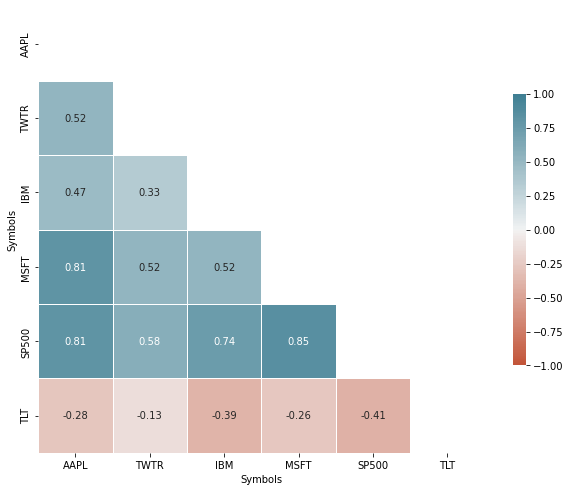

In [27]:
corr = test_correlation("TLT")
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(
    data=corr,
    annot=True,
    vmin=-1,
    vmax=1,
    center=0,
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    cmap=sns.diverging_palette(20, 220, n=200),
    linewidths=.5, cbar_kws={"shrink": .5},
    square=True,
    ax=ax
)
plt.show()